<a href="https://colab.research.google.com/github/lklmkv/tvp3t/blob/main/pptk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [40]:


df = pd.read_csv("asthma_disease_data.csv",
                 names = ['patient_id', 'age', 'gender', 'ethnicity', 'education_level', 'bmi',
                          'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
                          'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
                          'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever',
                          'gastroesophageal_reflux', 'lung_function_fev1', 'lung_function_fvc',
                          'wheezing', 'shortness_of_breath', 'chest_tightness', 'coughing',
                          'nighttime_symptoms', 'exercise_induced', 'diagnosis', 'Doctor_In_Charge'])

df = df.drop(labels=df.index[0])
df.head()

,patient_id,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,...,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis,Doctor_In_Charge
1,5034,63,0,1,0,15.848744398517509,0,0.8944483090233335,5.488695584993768,8.701002733591553,...,1.3690511997873338,4.9412056608744575,0,0,1,0,0,1,0,Dr_Confid
2,5035,26,1,2,2,22.757042093725453,0,5.897329493528446,6.341014020966575,5.1539663695461675,...,2.1977673320193754,1.7023934274209584,1,0,0,1,1,1,0,Dr_Confid
3,5036,57,0,2,1,18.395396474046787,0,6.739367010951074,9.196237204622909,6.840646602827763,...,1.6980111954631716,5.022552952446855,1,1,1,0,1,1,0,Dr_Confid
4,5037,40,1,2,1,38.51527789070205,0,1.4045026784207648,5.826531797560653,4.2530355123076795,...,3.032036571543802,2.300159060008337,1,0,1,1,1,0,0,Dr_Confid
5,5038,61,0,0,3,19.283802043133818,0,4.6044926148128855,3.127048193671432,9.625799205296698,...,3.4705892211031064,3.067943509326034,1,1,1,0,0,1,0,Dr_Confid


In [39]:
df.describe()

,patient_id,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,...,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis,Doctor_In_Charge
count,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392,...,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392
unique,2392,75,2,4,4,2392,2,2392,2392,2392,...,2392,2392,2,2,2,2,2,2,2,1
top,5034,51,0,0,1,15.848744398517509,0,0.8944483090233335,5.488695584993768,8.701002733591553,...,1.3690511997873338,4.9412056608744575,1,1,1,1,1,1,0,Dr_Confid
freq,1,47,1212,1465,933,1,2053,1,1,1,...,1,1,1426,1197,1204,1204,1441,1447,2268,2392


In [41]:
df = df.drop(columns=['Doctor_In_Charge', 'patient_id'], axis=1)
df = df.apply(pd.to_numeric)
df.describe()


,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,...,gastroesophageal_reflux,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,5.013030,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,2.935605,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,2.432559,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,5.036519,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,7.630037,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 1 to 2392
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      2392 non-null   int64  
 1   gender                   2392 non-null   int64  
 2   ethnicity                2392 non-null   int64  
 3   education_level          2392 non-null   int64  
 4   bmi                      2392 non-null   float64
 5   smoking                  2392 non-null   int64  
 6   physical_activity        2392 non-null   float64
 7   diet_quality             2392 non-null   float64
 8   sleep_quality            2392 non-null   float64
 9   pollution_exposure       2392 non-null   float64
 10  pollen_exposure          2392 non-null   float64
 11  dust_exposure            2392 non-null   float64
 12  pet_allergy              2392 non-null   int64  
 13  family_history_asthma    2392 non-null   int64  
 14  history_of_allergies    

In [43]:
duplicateRows = df[df.duplicated()]
duplicateRows

,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,...,gastroesophageal_reflux,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis


<Axes: >

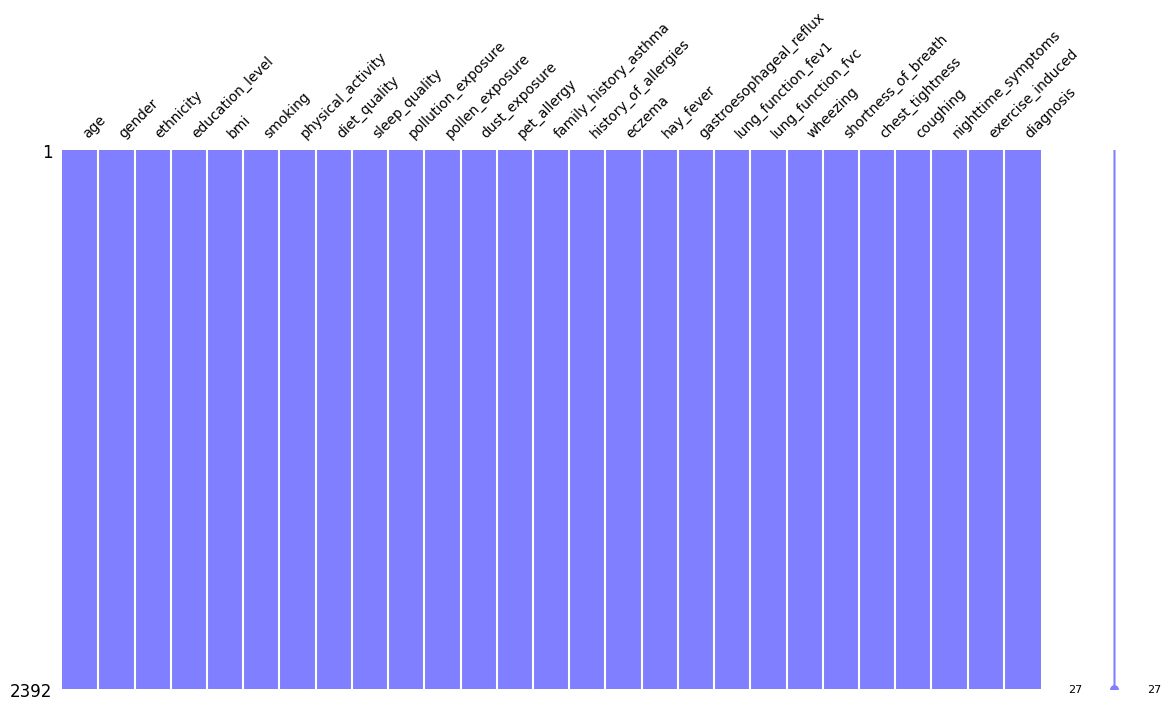

In [37]:
import missingno as msno

msno.matrix(df, figsize=(14,7), fontsize=10, color=(0.5, 0.5, 1.0)) # Цвет в формате RGB (красный, зеленый, синий)

In [44]:
print('Количество уникальных значений для каждого столбца (df.nunique()):\n', df.nunique())
 # количество уникальных значений для каждого столбца

Количество уникальных значений для каждого столбца (df.nunique()):
 age                          75
gender                        2
ethnicity                     4
education_level               4
bmi                        2392
smoking                       2
physical_activity          2392
diet_quality               2392
sleep_quality              2392
pollution_exposure         2392
pollen_exposure            2392
dust_exposure              2392
pet_allergy                   2
family_history_asthma         2
history_of_allergies          2
eczema                        2
hay_fever                     2
gastroesophageal_reflux       2
lung_function_fev1         2392
lung_function_fvc          2392
wheezing                      2
shortness_of_breath           2
chest_tightness               2
coughing                      2
nighttime_symptoms            2
exercise_induced              2
diagnosis                     2
dtype: int64
